In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
df =pd.read_csv ('G:\\ML & AI 99DaysWithCPC\\Key Algorithms\\Logistic Regression\\Titanic Train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

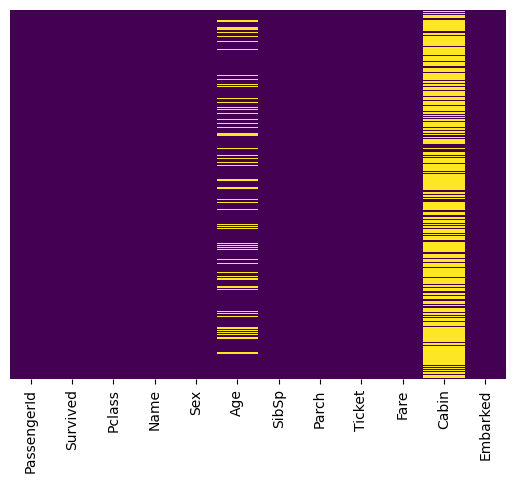

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

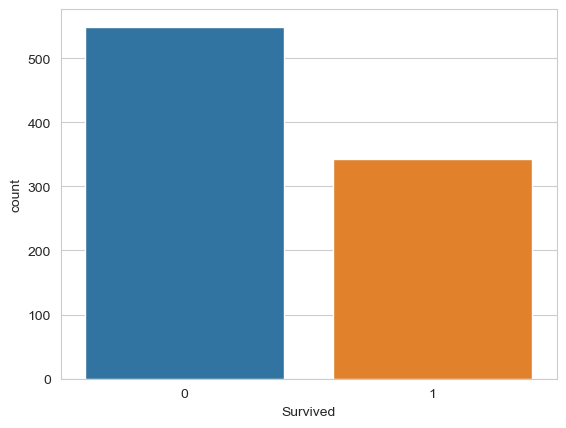

In [11]:
sns.countplot(x='Survived', data = df)

<Axes: xlabel='Survived', ylabel='count'>

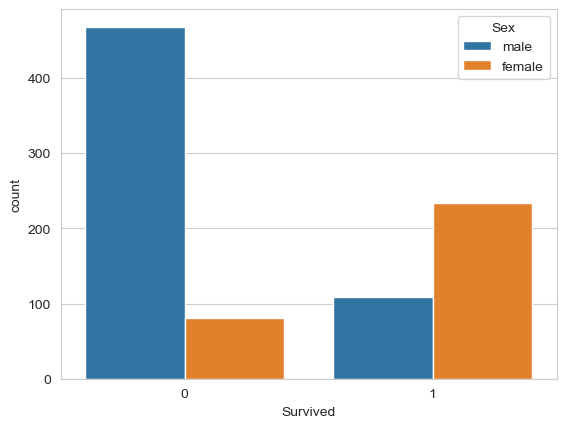

In [12]:
sns.countplot(x='Survived', hue='Sex', data = df)

<Axes: xlabel='Survived', ylabel='count'>

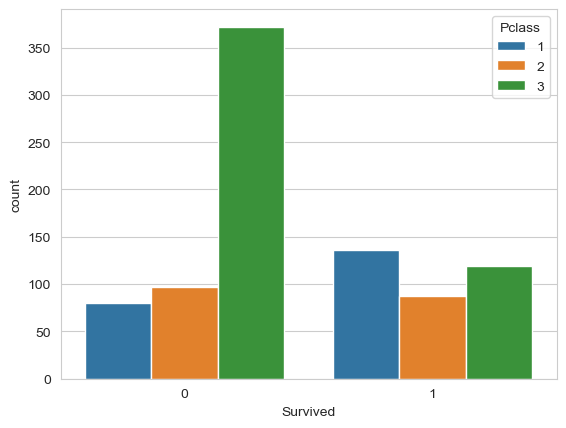

In [13]:
sns.countplot(x='Survived', hue='Pclass', data = df)

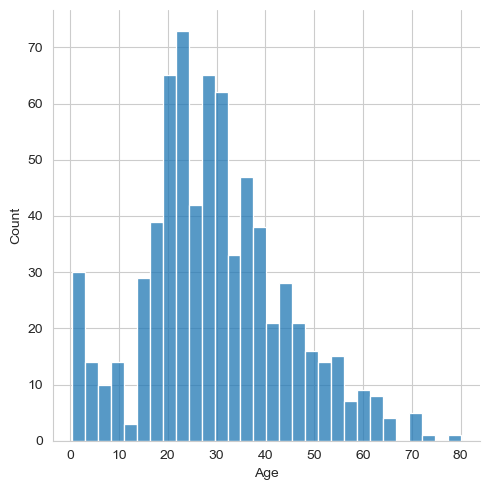

In [16]:
sns.displot(df['Age'].dropna(), bins=30)

<Axes: >

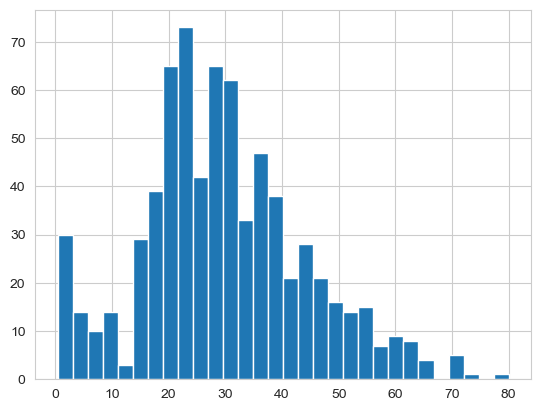

In [18]:
df['Age'].hist(bins=30)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

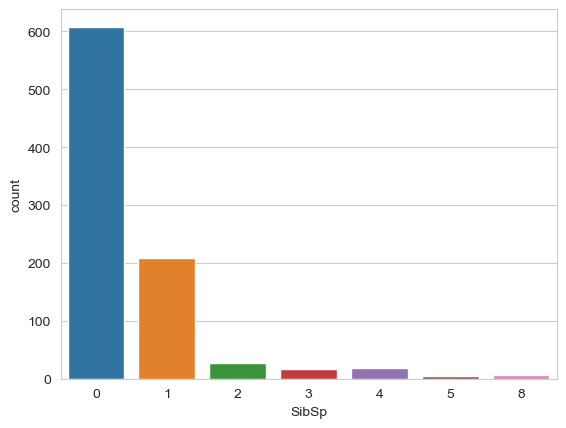

In [20]:
sns.countplot(x='SibSp', data=df)

<Axes: >

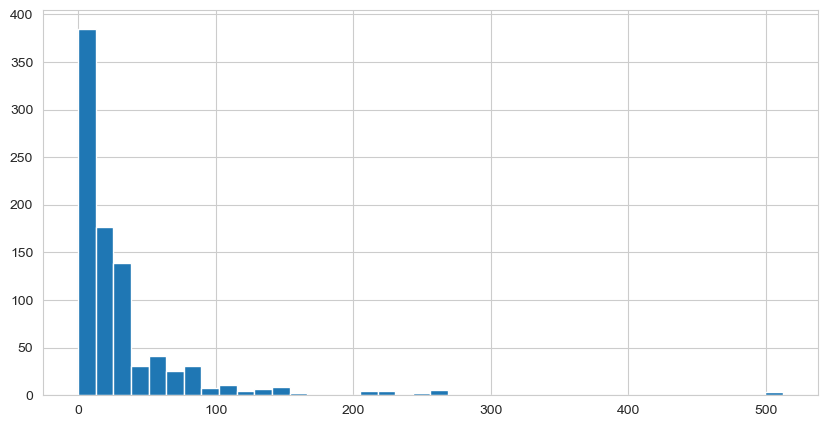

In [21]:
df['Fare'].hist(bins=40, figsize=(10, 5))

In [22]:
import cufflinks as cf

In [23]:
cf.go_offline()

In [24]:
df['Fare'].iplot(kind='hist', bins=50)

<Axes: xlabel='Pclass', ylabel='Age'>

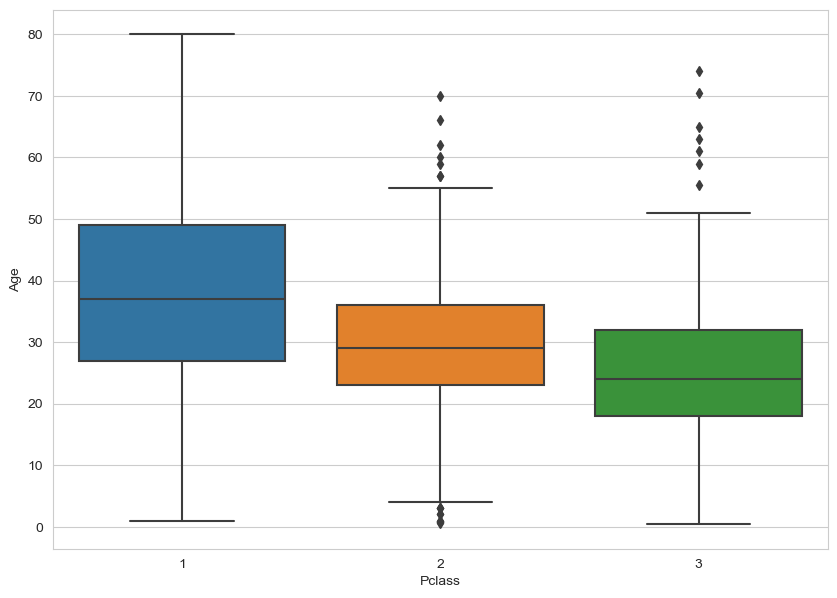

In [25]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=df)

## Data Manupulation or Dealing with missing values

In [26]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
df['Age'] = df[['Age', 'Pclass']].apply(input_age, axis=1)

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

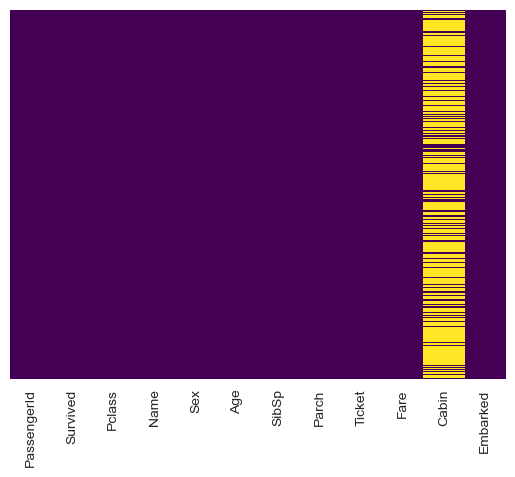

In [30]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### In Cabin column have a lots of missing information, cabins numbers are also unique, that's why drop the cabin column.

In [31]:
df.drop('Cabin', axis = 1, inplace = True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Use dropna if still any column have missing values

In [33]:
df.dropna(inplace=True)

<Axes: >

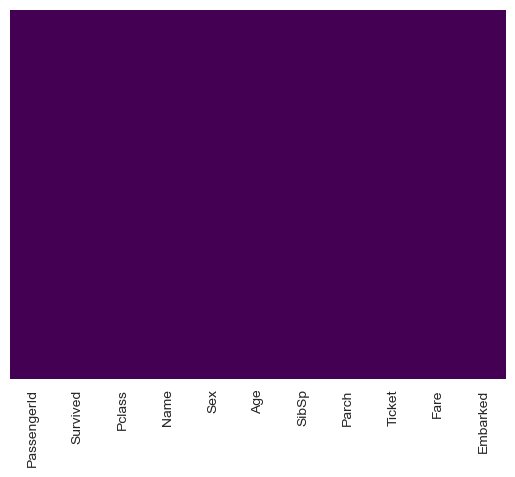

In [35]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Here some columns are categorical columns, we need identify these class as a numerical. So, that's why we need to create here dummy variables.

In [36]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [38]:
# For simple and more specify
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [39]:
# same thing do with embark column
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [40]:
 df = pd.concat([df, sex, embark], axis=1)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### Now drop all unnecessary column also Sex and Embarked column, because already we add another three column for replace.

In [42]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Train Data and Split Data

In [44]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression(max_iter=10000)

In [49]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [50]:
predictions = logmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [53]:
print(confusion_matrix(y_test, predictions))

[[149  14]
 [ 33  71]]


In [54]:
print(accuracy_score(y_test, predictions))

0.8239700374531835
